#### Analyst: Dhruv Singh <br> Report Name: Success Classifier, Phase 1.2: Graphs <br> Report Quarter, Year: FY 2011-2021 <br> Date Updated: 10/23/2021

# Phase I. B: Graphs

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
# Read in data
df = pd.read_csv('2_data/1_cleaned_data.csv')
df.head()

,StateId,ProgramTitle,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,...,Race_White,ActualstartDate,ActualEndDate,EmpName,Employed,Length,StartMonth,StartYear,EndMonth,EndYear
0,20,Transitional Employment Program (Way to Work),40,0,1,1,11,0,0,0,...,0,2018-03-23,2018-03-23,Helix Electric,1,0,3,2018,3,2018
1,20,Transitional Employment Program (Way to Work),40,0,1,1,11,0,0,0,...,0,2019-10-25,2019-10-25,Helix Electric,1,0,10,2019,10,2019
2,34,DC Infrastructure Academy,50,0,1,1,14,0,0,0,...,0,2019-08-27,2019-08-28,0,0,1,8,2019,8,2019
3,34,Transitional Employment Program (Way to Work),50,0,1,1,14,0,0,0,...,0,2012-07-20,2012-07-20,0,0,0,7,2012,7,2012
4,58,Title I - Workforce Development (WIOA),53,0,1,1,14,0,0,0,...,0,2016-07-21,2016-07-21,0,0,0,7,2016,7,2016


In [3]:
# dropping date columns
df = df.drop(['ActualstartDate', 'ActualEndDate'], axis=1)

In [4]:
df.dtypes

StateId                  int64
ProgramTitle            object
Age_AtReg                int64
Disability               int64
Gender                   int64
CitizenStatus            int64
EducationLevel           int64
Race_Hispanic            int64
Race_NativeAmerican      int64
Race_Asian               int64
Race_AfricanAmerican     int64
Race_PacificIslander     int64
Race_White               int64
EmpName                 object
Employed                 int64
Length                   int64
StartMonth               int64
StartYear                int64
EndMonth                 int64
EndYear                  int64
dtype: object

### Part 2: Customer Exits: Predictive

In [5]:
df.shape

(38263, 20)

In [6]:
# services are inflated, and need to be readjusted for story
df2 = df.sort_values(by=["StateId", "ProgramTitle", "EmpName", "StartYear"], ascending = (True, True, True, False))

In [7]:
# dropping dups, keeping 1 rows for each approach and program enrollment.
df2 = df2.drop_duplicates(subset = ["StateId", "ProgramTitle", "EmpName"], keep='first')

In [8]:
df2.shape

(26739, 20)

### Graph 1: Employments Overall

In [9]:
df2.Employed.unique()

array([1, 0], dtype=int64)

In [10]:
df2_emp = df2[df2.Employed==1]

In [11]:
# creating enrollments table
df2_emp = df2_emp[['StartYear', 'StateId']].groupby('StartYear').count()

In [12]:
df2_emp

,StateId
StartYear,
2011,237
2012,168
2013,119
2014,155
2015,369
2016,756
2017,1019
2018,1239
2019,1551


In [13]:
df2_emp = df2_emp.rename(columns = {"StateId": "Employments"})
df2_emp

,Employments
StartYear,
2011,237
2012,168
2013,119
2014,155
2015,369
2016,756
2017,1019
2018,1239
2019,1551


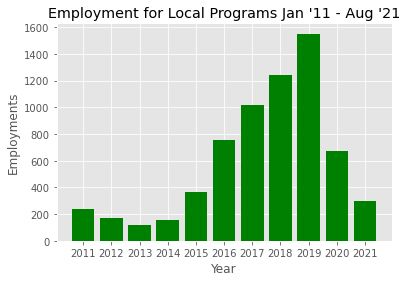

In [15]:
plt.style.use('ggplot')

x = df2_emp.index.tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, df2_emp['Employments'], color='green')
plt.xlabel("Year")
plt.ylabel("Employments")
plt.title("Employment for Local Programs Jan '11 - Aug '21")

plt.xticks(x_pos, x)

plt.savefig('3_graphs/2.1_unique_employments.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph 2: Employments by Age

In [16]:
df2_age1 = df2[df2.Employed==1]
df2_age0 = df2[df2.Employed==0]

In [17]:
# creating enrollments table
df2_age1 = df2_age1[['Age_AtReg', 'StateId']].groupby('Age_AtReg').count()
df2_age0 = df2_age0[['Age_AtReg', 'StateId']].groupby('Age_AtReg').count()

In [18]:
df2_age1

,StateId
Age_AtReg,
0,9
14,10
15,9
16,21
17,35
...,...
72,1
73,1
74,1


In [19]:
df2_age0

,StateId
Age_AtReg,
0,86
14,30
15,71
16,164
17,270
...,...
77,1
78,1
80,1


In [20]:
df2_age1 = df2_age1.rename(columns = {"StateId": "Employments"})
df2_age0 = df2_age0.rename(columns = {"StateId": "Employments"})

In [21]:
df2_age1 = df2_age1.reset_index()
df2_age0 = df2_age0.reset_index()

In [22]:
df2_age1 = df2_age1[df2_age1.Age_AtReg != 0]
df2_age0 = df2_age0[df2_age0.Age_AtReg != 0]

In [23]:
#df2_age1 = df2_age1.set_index('Age_AtReg')
#df2_age0 = df2_age0.set_index('Age_AtReg')

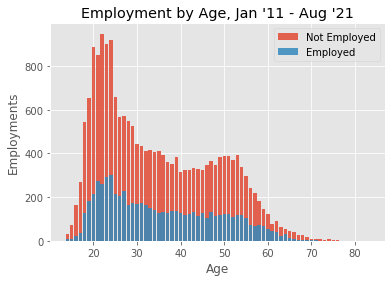

In [58]:
# creating plot
plt.figure()

plt.bar(df2_age0['Age_AtReg'], df2_age0['Employments'], alpha=0.85, label='Not Employed');
plt.bar(df2_age1['Age_AtReg'], df2_age1['Employments'], alpha=0.85, label='Employed');
plt.legend();
plt.title("Employment by Age, Jan '11 - Aug '21");
plt.xlabel('Age')
plt.ylabel("Employments")

#plt.xticks(rotation=90, fontsize=5);
plt.savefig('3_graphs/2.2_employment_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph 3: Gender

In [35]:
df2.Gender.unique()

array([1, 2, 0], dtype=int64)

In [36]:
df2_male = df2[df2.Gender==1]
df2_female = df2[df2.Gender==2]

In [37]:
df2_male = df2_male[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_female = df2_female[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])

In [38]:
df2_male

Employed     
             count  sum
StartYear              
2011          1224   97
2012          1211  115
2013           835   88
2014           649   71
2015           780  164
2016          1307  331
2017          1517  518
2018          2025  635
2019          3143  864
2020          1236  388
2021           970  169

In [39]:
df2_female

Employed     
             count  sum
StartYear              
2011          1019  140
2012           924   53
2013           656   30
2014           408   84
2015           636  205
2016          1038  425
2017          1413  501
2018          1877  603
2019          2206  685
2020           819  288
2021           821  130

In [40]:
df2_male.columns = df2_male.columns.get_level_values(1)
df2_male = df2_male.rename(columns = {"count": "Total", "sum": "Completions"})
df2_male['Male Employed %'] = (df2_male.Completions / df2_male.Total)*100

In [41]:
df2_female.columns = df2_female.columns.get_level_values(1)
df2_female = df2_female.rename(columns = {"count": "Total", "sum": "Completions"})
df2_female['Female Employed %'] = (df2_female.Completions / df2_female.Total)*100

In [42]:
df2_male

,Total,Completions,Male Employed %
StartYear,,,
2011,1224,97,7.924837
2012,1211,115,9.496284
2013,835,88,10.538922
2014,649,71,10.939908
2015,780,164,21.025641
2016,1307,331,25.325172
2017,1517,518,34.146341
2018,2025,635,31.358025
2019,3143,864,27.489660


In [43]:
df2_female

,Total,Completions,Female Employed %
StartYear,,,
2011,1019,140,13.738960
2012,924,53,5.735931
2013,656,30,4.573171
2014,408,84,20.588235
2015,636,205,32.232704
2016,1038,425,40.944123
2017,1413,501,35.456476
2018,1877,603,32.125733
2019,2206,685,31.051677


In [46]:
df2_male = df2_male[['Male Employed %']]

In [47]:
df2_female = df2_female[['Female Employed %']]

In [48]:
df2_male

,Male Employed %
StartYear,
2011,7.924837
2012,9.496284
2013,10.538922
2014,10.939908
2015,21.025641
2016,25.325172
2017,34.146341
2018,31.358025
2019,27.489660


In [49]:
df2_female

,Female Employed %
StartYear,
2011,13.738960
2012,5.735931
2013,4.573171
2014,20.588235
2015,32.232704
2016,40.944123
2017,35.456476
2018,32.125733
2019,31.051677


In [50]:
df2_emp_gender = pd.merge(df2_male, df2_female, how = 'inner', left_index=True, right_index=True)

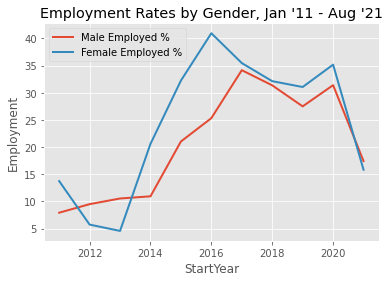

In [51]:
## comparing enrollment numbers
df2_emp_gender.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Employment Rates by Gender, Jan '11 - Aug '21")
plt.ylabel("Employment")
plt.savefig('3_graphs/2.3_enrollments_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph 4: Race

In [68]:
# renaming columns
df2 = df2.rename(columns = {"Race_Hispanic": "Hispanic",
                            "Race_NativeAmerican": "NativeAmerican",
                            "Race_Asian": "Asian",
                            "Race_AfricanAmerican": "AfricanAmerican",
                            "Race_PacificIslander": "PacificIslander",
                            "Race_White": "White"})

In [69]:
df2_race = df2[['StartYear', 'Employed', 'Hispanic', 'NativeAmerican', 'Asian', 'AfricanAmerican', 'PacificIslander', 'White']]

In [70]:
df2_race1 = df2_race[df2_race.Hispanic==1]
df2_race2 = df2_race[df2_race.NativeAmerican==1]
df2_race3 = df2_race[df2_race.Asian==1]
df2_race4 = df2_race[df2_race.AfricanAmerican==1]
df2_race5 = df2_race[df2_race.PacificIslander==1]
df2_race6 = df2_race[df2_race.White==1]

In [71]:
df2_race1 = df2_race1[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_race2 = df2_race2[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_race3 = df2_race3[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_race4 = df2_race4[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_race5 = df2_race5[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_race6 = df2_race6[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])

In [72]:
df2_race1.columns = df2_race1.columns.get_level_values(1)
df2_race1 = df2_race1.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race1['Hispanic'] = (df2_race1.Completions / df2_race1.Total)*100

df2_race2.columns = df2_race2.columns.get_level_values(1)
df2_race2 = df2_race2.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race2['NativeAmerican'] = (df2_race2.Completions / df2_race2.Total)*100

df2_race3.columns = df2_race3.columns.get_level_values(1)
df2_race3 = df2_race3.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race3['Asian'] = (df2_race3.Completions / df2_race3.Total)*100

df2_race4.columns = df2_race4.columns.get_level_values(1)
df2_race4 = df2_race4.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race4['AfricanAmerican'] = (df2_race4.Completions / df2_race4.Total)*100

df2_race5.columns = df2_race5.columns.get_level_values(1)
df2_race5 = df2_race5.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race5['PacificIslander'] = (df2_race5.Completions / df2_race5.Total)*100

df2_race6.columns = df2_race6.columns.get_level_values(1)
df2_race6 = df2_race6.rename(columns = {"count": "Total", "sum": "Completions"})
df2_race6['White'] = (df2_race6.Completions / df2_race1.Total)*100

In [73]:
df2_race1 = df2_race1[['Hispanic']]
df2_race2 = df2_race2[['NativeAmerican']]
df2_race3 = df2_race3[['Asian']]
df2_race4 = df2_race4[['AfricanAmerican']]
df2_race5 = df2_race5[['PacificIslander']]
df2_race6 = df2_race6[['White']]

In [74]:
df2_race_m1 = pd.merge(df2_race1, df2_race2, how = 'inner', left_index=True, right_index=True)
df2_race_m2 = pd.merge(df2_race_m1, df2_race3, how = 'inner', left_index=True, right_index=True)
df2_race_m3 = pd.merge(df2_race_m2, df2_race4, how = 'inner', left_index=True, right_index=True)
df2_race_m4 = pd.merge(df2_race_m3, df2_race5, how = 'inner', left_index=True, right_index=True)
df2_race_m5 = pd.merge(df2_race_m4, df2_race6, how = 'inner', left_index=True, right_index=True)

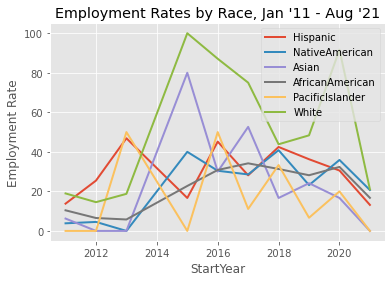

In [75]:
## comparing enrollment numbers
df2_race_m5.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Employment Rates by Race, Jan '11 - Aug '21")
plt.ylabel("Employment Rate")
plt.savefig('3_graphs/2.4_enrollments_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph 5: Citizenship

In [76]:
df2_cit = df2[df2.CitizenStatus==1]
df2_res = df2[df2.CitizenStatus==2]
df2_aln = df2[df2.CitizenStatus==3]

In [77]:
df2_cit = df2_cit[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_res = df2_res[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])
df2_aln = df2_aln[['StartYear', 'Employed']].groupby(['StartYear']).agg(['count', 'sum'])

In [78]:
df2_cit.columns = df2_cit.columns.get_level_values(1)
df2_cit = df2_cit.rename(columns = {"count": "Total", "sum": "Completions"})
df2_cit['Citizen'] = (df2_cit.Completions / df2_cit.Total)*100

df2_res.columns = df2_res.columns.get_level_values(1)
df2_res = df2_res.rename(columns = {"count": "Total", "sum": "Completions"})
df2_res['Resident'] = (df2_res.Completions / df2_res.Total)*100

df2_aln.columns = df2_aln.columns.get_level_values(1)
df2_aln = df2_aln.rename(columns = {"count": "Total", "sum": "Completions"})
df2_aln['Alien'] = (df2_aln.Completions / df2_aln.Total)*100

In [79]:
df2_cit = df2_cit[['Citizen']]
df2_res = df2_res[['Resident']]
df2_aln = df2_aln[['Alien']]

In [81]:
df2_cit_m1 = pd.merge(df2_cit, df2_res, how = 'inner', left_index=True, right_index=True)
df2_cit_m2 = pd.merge(df2_cit_m1, df2_aln, how = 'inner', left_index=True, right_index=True)

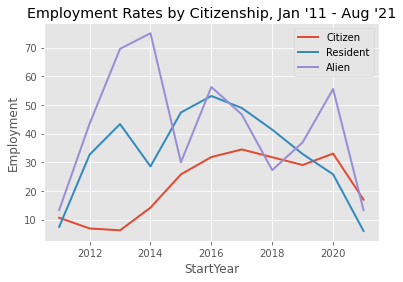

In [82]:
## comparing enrollment numbers
df2_cit_m2.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Employment Rates by Citizenship, Jan '11 - Aug '21")
plt.ylabel("Employment")
plt.savefig('3_graphs/2.4_enrollments_by_citizenship.png', dpi=300, bbox_inches='tight')
plt.show()

### Graph 6: Education

In [116]:
df2_educ1 = df2[df2.Employed==1]
df2_educ0 = df2[df2.Employed==0]

In [117]:
# creating enrollments table
df2_educ1 = df2_educ1[['EducationLevel', 'StateId']].groupby('EducationLevel').count()
df2_educ0 = df2_educ0[['EducationLevel', 'StateId']].groupby('EducationLevel').count()

In [118]:
df2_educ1 = df2_educ1.rename(columns = {"StateId": "Employed"})
df2_educ0 = df2_educ0.rename(columns = {"StateId": "Not Employed"})

In [119]:
df2_educ_m1 = pd.merge(df2_educ1, df2_educ0, how = 'inner', left_index=True, right_index=True)

In [120]:
df2_educ_m1

,Employed,Not Employed
EducationLevel,,
0,135,436
1,3,4
3,5,4
4,3,4
5,3,2
6,17,21
7,20,81
8,34,184
9,94,377


In [121]:
df2_educ_m1 = df2_educ_m1.sort_values(by=['Not Employed'])
df2_educ_m1

,Employed,Not Employed
EducationLevel,,
5,3,2
1,3,4
3,5,4
4,3,4
6,17,21
7,20,81
8,34,184
12,144,249
19,195,372


In [122]:
df2_educ_m1 = df2_educ_m1.reset_index()

In [123]:
df2_educ_m1 = df2_educ_m1[df2_educ_m1.EducationLevel >= 9]

In [124]:
# renaming educational level categories

df2_educ_m1.loc[df2_educ_m1.EducationLevel == 9, 'EducationLevel'] = '9th Grade'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 10, 'EducationLevel'] = '10th Grade'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 11, 'EducationLevel'] = '11th Grade'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 12, 'EducationLevel'] = '12th, no dipl.'

df2_educ_m1.loc[df2_educ_m1.EducationLevel == 13, 'EducationLevel'] = 'GED or equivalent'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 14, 'EducationLevel'] = 'HS Diploma'

df2_educ_m1.loc[df2_educ_m1.EducationLevel == 15, 'EducationLevel'] = 'HS + 1yr Technical'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 16, 'EducationLevel'] = 'HS + 2yr Technical'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 17, 'EducationLevel'] = 'HS + 3yr Technical'

df2_educ_m1.loc[df2_educ_m1.EducationLevel == 18, 'EducationLevel'] = 'Technical Certificate'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 19, 'EducationLevel'] = 'Associates Degree'
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 20, 'EducationLevel'] = "Bachelor's Degree"
df2_educ_m1.loc[df2_educ_m1.EducationLevel == 21, 'EducationLevel'] = "Bachelor's and beyond"

In [125]:
df2_educ_m1 = df2_educ_m1.set_index('EducationLevel')

In [126]:
df2_educ_m1

,Employed,Not Employed
EducationLevel,,
"12th, no dipl.",144,249
Associates Degree,195,372
9th Grade,94,377
HS + 3yr Technical,207,576
Bachelor's and beyond,480,647
10th Grade,123,735
Technical Certificate,333,964
11th Grade,185,986
Bachelor's Degree,791,1372


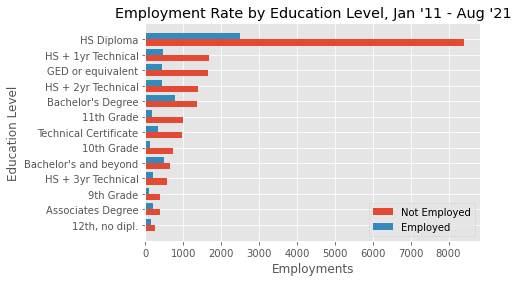

In [127]:
X = df2_educ_m1.index.tolist()
  
X_axis = np.arange(len(X))

plt.barh(X_axis - 0.2, df2_educ_m1['Not Employed'], 0.4, label = 'Not Employed')
plt.barh(X_axis + 0.2, df2_educ_m1['Employed'], 0.4, label = 'Employed')
  
plt.yticks(X_axis, X)
plt.xlabel("Employments")
plt.ylabel("Education Level")
plt.title("Employment Rate by Education Level, Jan '11 - Aug '21")
plt.legend()
plt.savefig('3_graphs/graph2.5_employments_by_education.png', dpi=300, bbox_inches='tight')
plt.show()
